# 성적 데이터 분석

인코고등학교 1학년의 중간고사 성적이 나왔습니다. 1반과 2반 두개의 반으로 구성되어 있고, 학생은 각각 6명입니다. 이 성적 데이터로 간단한 데이터 분석을 하고자 합니다.

In [1]:
%matplotlib inline
import numpy as np  ## 백터, 행렬 데이터 전문 모듈 numpy
import pandas as pd  ## 고수준 데이터 모델 (DataFrame) 모듈 pandas
import matplotlib.pyplot as plt  ## 차트 그리기 모듈 matplotlib
import scipy.stats as stats      ## 통계 등 과학용 모듈 scipy

CSV 파일을 불러옵니다. pandas의 read_csv 함수를 이용합니다. df라는 변수에 DataFrame으로 만듭니다.

In [2]:
df = pd.read_csv('score.csv')
df

,반,이름,국어,영어,수학,과학
0,1,성춘향,67,87,90,98
1,1,이몽룡,45,45,56,98
2,1,향단이,95,59,96,88
3,1,방자,65,94,89,98
4,1,월매,45,65,78,98
5,1,변학도,78,76,98,89
6,2,홍길동,87,67,65,56
7,2,임꺽정,89,98,78,78
8,2,전우치,100,78,56,65
9,2,일지매,99,89,87,87


여기에 기본적인 통계인 총점과 평균을 추가해서, 평균으로 정렬해보겠습니다.

In [3]:
subjects = ['국어', '영어', '수학', '과학']
df['총점'] = df[subjects].sum(axis=1)
df['평균']= df['총점'] / len(subjects)
df.sort_values(['평균'], ascending=[False])

,반,이름,국어,영어,수학,과학,총점,평균
9,2,일지매,99,89,87,87,362,90.50
3,1,방자,65,94,89,98,346,86.50
7,2,임꺽정,89,98,78,78,343,85.75
0,1,성춘향,67,87,90,98,342,85.50
5,1,변학도,78,76,98,89,341,85.25
2,1,향단이,95,59,96,88,338,84.50
11,2,콩쥐,65,89,87,78,319,79.75
8,2,전우치,100,78,56,65,299,74.75
4,1,월매,45,65,78,98,286,71.50
6,2,홍길동,87,67,65,56,275,68.75


일지매가 전교 1등이네요. 

총점으로 막대그래프를 그려볼까요? 그래프를 그리기전, matplotlib에서 한국어가 잘 표시되기 위해 다음을 실행합니다. (OS X에서 테스트 중인데, 기본 폰트에 한국어가 없나봅니다.)

In [4]:
import matplotlib
matplotlib.rc('font', family='AppleGothic')

자료를 평균으로 내림차순 정렬하고, 각 데이터의 이름을 `이름` 필드를 사용하도록 한 후, 막대그래프를 그려봅니다. 

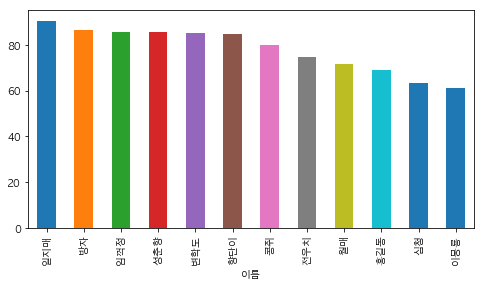

In [5]:
sorted_df = df.sort_values(['평균'], ascending=[False])
sorted_df.index = sorted_df['이름']
sorted_df['평균'].plot(kind='bar', figsize=(8, 4))

막대그래프로 평균점수를 보니까, 2위 그룹들이 비슷비슷하네요. 일지매는 방심하면 안되겠네요.

## 1반과 2반의 점수 비교

그럼 이번에는 1반과 2반중 어느반이 더 잘했나 볼까요? 담임선생님들 이것에 민감하죠?

In [6]:
일반 = df[df['반'] == 1]
이반 = df[df['반'] == 2]
일반평균 = 일반['총점'].sum() / (6 * 4)
이반평균 = 이반['총점'].sum() / (6 * 4)
일반평균, 이반평균

(79.04166666666667, 77.125)

1반이 평균이 높네요. (파이썬 3은 변수명을 한국어로 쓸 수 도 있습니다. "1반" 이라고 변수를 쓰고 싶었지만, 파이썬 변수 명명 규칙이 숫자로 시작하면 안되기 때문에 그냥 저렇게 표시합니다.) 

1반 선생님 좋아합니다. 그걸 보고있던 2반 선생님이 "별 차이도 안나는구먼 뭘" 이라고 합니다. 

정말 두 반의 평균은 차이가 없는 걸까요? 서로 독립적인 두 집단에서 얻어진 수치형 자료로 부터 두 집단의 차이가 유의한지를 파악하는데는 독립표본 [t-검정](https://en.wikipedia.org/wiki/Student%27s_t-test) (two independent sample t-test)이 유용합니다. scipy의 ttest_ind 함수를 이용하여 바로 계산이 가능합니다.

In [7]:
stats.ttest_ind(일반['평균'], 이반['평균'])

Ttest_indResult(statistic=0.319960228209846, pvalue=0.755583336185639)

`p value > 0.005` 이므로 두 집단이 차이가 없다는 영가설을 채택합니다. 즉 1반과 2반은 사실 유의한 점수차이가 없습니다. 오차수준에 의한 차이라고 봐야겠네요. 1반 선생님 그렇게 좋아하시면 아니될 듯.

혹시 과목별로는 차이가 있을까요? 과목별로도 확인해보겠습니다.

In [8]:
for subject in subjects:
    print(subject, stats.ttest_ind(일반[subject], 이반[subject]))

국어 Ttest_indResult(statistic=-2.490140665442242, pvalue=0.031982494983816424)
영어 Ttest_indResult(statistic=-0.6156907152631581, pvalue=0.5518533781528807)
수학 Ttest_indResult(statistic=1.4961318778859336, pvalue=0.1654958420079056)
과학 Ttest_indResult(statistic=4.328442555331755, pvalue=0.0014931977711732465)


과학 과목은 p value < 0.005 입니다. 차이가 많이 나네요. 평균이 어떻길래.

In [10]:
일반['과학'].sum() / 6, 이반['과학'].sum() / 6

(94.83333333333333, 69.66666666666667)

역시 차이가 많이 났군요. 1반 학생들은 과학에 소질이 많은 것 같습니다. 

## 과목별 비교 

과목별로 다른 특징이 있는 것 같습니다. 먼저 전체 데이터를 막대그래프로 그려보겠습니다. 앞서 그렸던 성적별 막대그래프를 과목별로 각각 그려보겠습니다. 

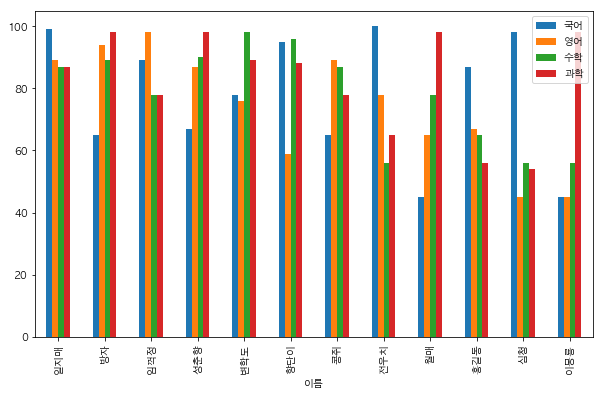

In [11]:
sorted_df[subjects].plot(kind='bar', figsize=(10, 6))

일지매는 전체적으로 점수가 고르게 높은데, 2등부터는 약간 들쑥날쑥하네요. 과목별 점수 분포를 볼까요? boxplot으로 그려보겠습니다.

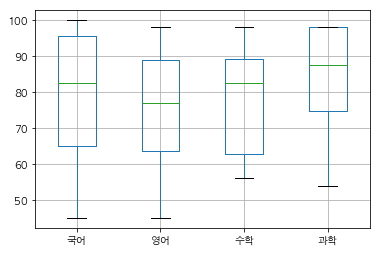

In [12]:
df[subjects].boxplot(return_type='axes')

1반과 2반을 각각 boxplot으로 그려봅시다.

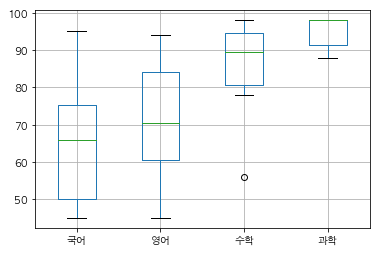

In [13]:
일반[subjects].boxplot(return_type='axes')

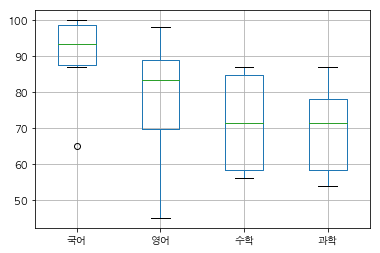

In [14]:
이반[subjects].boxplot(return_type='axes')

확실히, 1반의 과학점수가 좋네요. 분포 차이도 크지 않습니다. 대신 2반은 국어점수가 좋습니다.

## 과목별 상관도 

보통 수학 점수가 높으면 과학 점수가 높을 것이라고 기대할 수 있습니다. 국어 점수가 높으면 영어 점수가 높을 것이라고도 기대할 수 있죠. 언어능력, 수리능력이 별개의 특징처럼 생각될 수 도 있기 때문입니다. 여기 학생들도 그런지 살펴볼까요.

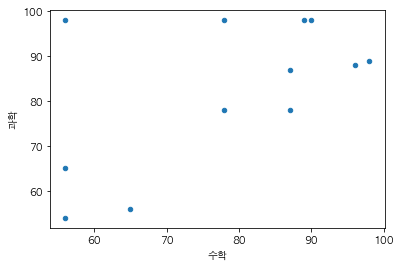

In [15]:
df.plot(kind='scatter', x='수학', y='과학')

수학점수가 높으면 과학점수도 높아 보입니다. 어느정도 상관관계가 보이네요. 얼마나 상관관계가 있을까요? 이렇때 상관계수를 구해볼 수 있습니다. [피어슨 상관계수](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient)를 구해볼까요? scipy의 stats 모듈에 함수가 있습니다. 

In [16]:
stats.pearsonr(df['수학'], df['과학'])

(0.5632890597067751, 0.05650580486155532)

앞 숫자가 상관계수 뒷 숫자가 p-value를 의미합니다. 상관계수가 0.5보다 높으므로, 관계가 있긴 하지만 p > 0.05 이므로, 유의한 상관관계가 있지는 않네요. 데이터가 좀 더 많아지면, p-value가 의미있어지는 경우가 많습니다. 이 경우는 데이터 n수가 작아서 의미를 찾기 어려운 것 같습니다. 국어와 영어는 어떨까요?

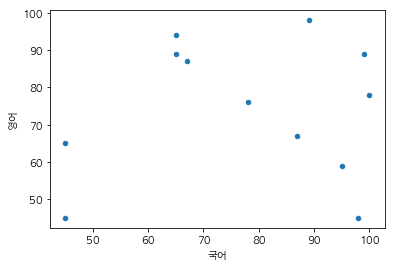

In [17]:
df.plot(kind='scatter', x='국어', y='영어')

In [18]:
stats.pearsonr(df['국어'], df['영어'])

(0.10566562777973997, 0.7437959551857836)

상관관계가 아주 약간 있어보이지만 별로 없네요. 이 경우도, 데이터가 많으면 좀 더 충분한 관계를 밝혀낼 수 있을 것 같습니다. 

## 학생별 성적 패턴 분석

학생별로 어떤 학생은 수학을 잘하면서 과학을 잘하지만 영어는 약할 수 있고, 또 어떤 학생은 다른 패턴으로 잘하는 과목에 대한 특징이 있을 수 있습니다. 학생들끼리 이러한 성적 패턴이 얼마나 비슷한지 비교해 볼 수 있을까요? 이를 확인할 수 있는 다양한 방법이 있습니다. 대표적인 방법으로 [주성분분석 (Principle component analysis)](https://ko.wikipedia.org/wiki/주성분_분석)이 있습니다. 학생별로 4과목이라는 특성을 두개로 축약한 후, 2차원 평면에 표시하면, 그 종합적인 차이를 한눈에 알 수 있습니다. 

PCA 분석은 [scikit-learn](http://scikit-learn.org/stable/)이라는 라이브러리를 설치하고 수행할 수 있습니다. 

PCA 분석의 입력자료는 4과목의 성적데이터 입니다.

In [19]:
df[subjects]

,국어,영어,수학,과학
0,67,87,90,98
1,45,45,56,98
2,95,59,96,88
3,65,94,89,98
4,45,65,78,98
5,78,76,98,89
6,87,67,65,56
7,89,98,78,78
8,100,78,56,65
9,99,89,87,87


이 데이터를 정규화합니다. 전체 데이터를 최대, 최소를 기준으로 재 정리합니다. 정규화하는 함수는 scikit-learn 라이브러리에서 제공됩니다. 

In [20]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df[subjects])
X_std

array([[-0.55809652,  0.72621778,  0.78954203,  1.01066629],
       [-1.70024754, -1.68176748, -1.44749373,  1.01066629],
       [ 0.89555023, -0.87910573,  1.18431305,  0.36897341],
       [-0.66192843,  1.12754865,  0.72374686,  1.01066629],
       [-1.70024754, -0.53510783,  0.        ,  1.01066629],
       [ 0.01297899,  0.09555497,  1.31590339,  0.43314269],
       [ 0.48022259, -0.42044187, -0.8553372 , -1.68444381],
       [ 0.5840545 ,  1.35688058,  0.        , -0.27271947],
       [ 1.15513001,  0.21022093, -1.44749373, -1.10692022],
       [ 1.10321405,  0.84088374,  0.59215653,  0.30480412],
       [ 1.0512981 , -1.68176748, -1.44749373, -1.81278239],
       [-0.66192843,  0.84088374,  0.59215653, -0.27271947]])

위 행렬데이터가 PCA의 입력으로 사용됩니다. PCA 분석 함수는 scikit-learn 라이브러리에 있습니다. 

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Y = pca.fit_transform(X_std)
Y

array([[-1.56591653, -0.09168753],
       [ 0.11774518,  2.93515218],
       [-0.20727166, -0.38845514],
       [-1.71984653, -0.24234692],
       [-1.11185524,  1.70512415],
       [-1.03327136, -0.43547978],
       [ 1.88205338, -0.20323602],
       [-0.10118555, -1.27408337],
       [ 1.88020684, -0.64411706],
       [-0.39554448, -1.36047251],
       [ 2.98704605,  0.37256038],
       [-0.7321601 , -0.37295837]])

`Y` 변수에 4과목(4차원)을 2차원으로 축약한 데이터 값이 저장됩니다. 보통 제1주성분, 제2주성분이라고도 합니다. 이를 원래 데이터(df)에 추가합니다.  

In [22]:
pca_df = pd.DataFrame(Y)
pca_df.index = df.index
pca_df.columns = ['PC1', 'PC2']
df2 = pd.concat([df, pca_df], axis=1)
df2

,반,이름,국어,영어,수학,과학,총점,평균,PC1,PC2
0,1,성춘향,67,87,90,98,342,85.50,-1.565917,-0.091688
1,1,이몽룡,45,45,56,98,244,61.00,0.117745,2.935152
2,1,향단이,95,59,96,88,338,84.50,-0.207272,-0.388455
3,1,방자,65,94,89,98,346,86.50,-1.719847,-0.242347
4,1,월매,45,65,78,98,286,71.50,-1.111855,1.705124
5,1,변학도,78,76,98,89,341,85.25,-1.033271,-0.435480
6,2,홍길동,87,67,65,56,275,68.75,1.882053,-0.203236
7,2,임꺽정,89,98,78,78,343,85.75,-0.101186,-1.274083
8,2,전우치,100,78,56,65,299,74.75,1.880207,-0.644117
9,2,일지매,99,89,87,87,362,90.50,-0.395544,-1.360473


위 데이터의 PC1, PC2 값으로 scatter plot을 그려봅니다. 1반과 2반의 차이를 알아보기 위해, 각각을 그룹핑하고, 다른 색으로 표시합니다. 

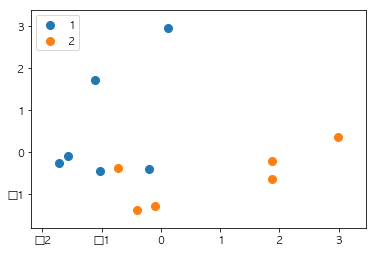

In [23]:
def draw_groups(groups, loc):
    fig, ax = plt.subplots()
    ax.margins(0.1)

    for name, group in groups:
        ax.plot(group['PC1'], group['PC2'], marker='o', linestyle='', ms=8, label=name)

    ax.legend(numpoints=1, loc=loc)
    
draw_groups(df2.groupby('반'), loc='upper left')

위 scatter plot에 의하면 `PC1 < 0, PC2 <0` 에 있는 7명의 학생이 어느 정도 비슷한 패턴을 갖는 것으로 보입니다. 이후, 교육 방침을 정하거나, 장래 희망 상담등을 할 때, 이 결과를 이용할 수 있을 것으로 보입니다.  

여기까지, 성적 데이터 분석을 통한 데이터 분석 사례 소개를 마칩니다. 이 예제는 성적이지만, 실제 실무적으로 유사한 데이터가 많습니다. 이들을 분석하는데 도움이 되시길 바랍니다. 

--김형용, Insilicogen. Inc., 2016-01-22